<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.1 -> 26.0.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 26.0.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 26.0.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Identify and manage missing values in key columns

critical_cols = ['Employment', 'JobSat', 'RemoteWork']

# Check missing values in these columns
missing_summary = df[critical_cols].isna().sum()
print("Missing values in critical columns:\n")
print(missing_summary)

# Strategy:
# - Employment: essential → drop rows where it's missing
# - JobSat: subjective but important → fill with "Unknown"
# - RemoteWork: categorical → fill with "Unknown"

# Drop rows missing Employment
df = df.dropna(subset=['Employment'])

# Fill missing JobSat and RemoteWork with a placeholder
df['JobSat'] = df['JobSat'].fillna('Unknown')
df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')

# Verify changes
print("\nMissing values after handling:\n")
print(df[critical_cols].isna().sum())


Missing values in critical columns:

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after handling:

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [4]:
# Uncomment to value‑count results that give a very clear picture of the data
print("YearsCodePro value counts:\n")
print(df['YearsCodePro'].value_counts(dropna=False))

print("\nJobSat value counts:\n")
print(df['JobSat'].value_counts(dropna=False))


YearsCodePro value counts:

YearsCodePro
NaN                   13827
2                      4168
3                      4093
5                      3526
10                     3251
4                      3215
Less than 1 year       2856
6                      2843
1                      2639
8                      2549
7                      2517
12                     1777
15                     1635
20                     1549
9                      1493
11                     1312
13                     1127
14                     1082
25                      998
16                      946
18                      867
17                      814
30                      689
24                      632
19                      516
22                      492
23                      448
26                      426
27                      380
21                      380
28                      342
35                      285
29                      196
40                      194
32     

Median Job Satisfaction by Experience Range:

ExperienceRange
0–5 years      7.0
5–10 years     7.0
10–20 years    7.0
20+ years      8.0
Name: JobSat, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_1256\1600796742.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['JobSat'] = df_exp['JobSat'].replace('Unknown', pd.NA)
C:\Users\USER\AppData\Local\Temp\ipykernel_1256\1600796742.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['JobSat'] = pd.to_numeric(df_exp['JobSat'], errors='coerce')
C:\Users\USER\AppData\Local\Temp\ipykernel_1256\1600796742.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


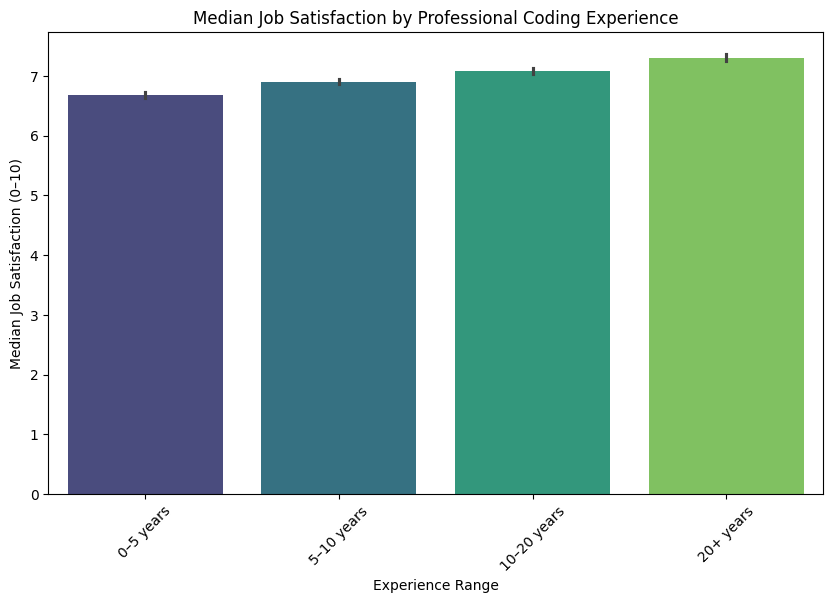

In [5]:
# Analysis of Experience and Job Satisfaction

# 1. Clean YearsCodePro based on value‑count patterns
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 50
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 2. Keep only rows with valid experience and job satisfaction
df_exp = df.dropna(subset=['YearsCodePro', 'JobSat'])
# FIX: Convert JobSat back to numeric
df_exp['JobSat'] = df_exp['JobSat'].replace('Unknown', pd.NA)
df_exp['JobSat'] = pd.to_numeric(df_exp['JobSat'], errors='coerce')
# 3. Create experience ranges
bins = [0, 5, 10, 20, 50]
labels = ['0–5 years', '5–10 years', '10–20 years', '20+ years']
df_exp['ExperienceRange'] = pd.cut(df_exp['YearsCodePro'], bins=bins, labels=labels, right=False)

# 4. Median Job Satisfaction by experience range
median_job_sat = df_exp.groupby('ExperienceRange')['JobSat'].median()
print("Median Job Satisfaction by Experience Range:\n")
print(median_job_sat)

# 5. Visualization (warning‑free)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_exp,
    x='ExperienceRange',
    y='JobSat',
    hue='ExperienceRange',
    palette='viridis',
    legend=False
)

plt.title('Median Job Satisfaction by Professional Coding Experience')
plt.xlabel('Experience Range')
plt.ylabel('Median Job Satisfaction (0–10)')
plt.xticks(rotation=45)
plt.show()


In [6]:
# # ## --Alternative Option--
# import pandas as pd
# import matplotlib.pyplot as plt

# # 1. Clean 'YearsCodePro'
# # Convert string entries to numbers and handle NaNs
# df['YearsCodePro'] = df['YearsCodePro'].replace({
#     'Less than 1 year': 0, 
#     'More than 50 years': 51
# })
# df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# # 2. Define the Experience Ranges (Bins)
# # Using 0, 5, 10, 20, and a high max for >20
# bins = [0, 5, 10, 20, 60]
# labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

# # 3. Create a new column for the range
# df['ExpRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

# # 4. Calculate Median JobSat for each range
# # We filter out NaNs in JobSat automatically using .groupby()
# median_satisfaction = df.groupby('ExpRange', observed=True)['JobSat'].median().reset_index()

# print("Median Job Satisfaction by Experience Range:\n")
# print(median_satisfaction)

# # 5. Visualization
# plt.figure(figsize=(10, 6))
# plt.bar(median_satisfaction['ExpRange'], median_satisfaction['JobSat'], color='teal', edgecolor='black')

# plt.title('Relationship Between Experience and Job Satisfaction', fontsize=14)
# plt.xlabel('Professional Coding Experience', fontsize=12)
# plt.ylabel('Median Job Satisfaction (0-10 Scale)', fontsize=12)
# plt.ylim(0, 10) # Set limit to 10 since your data goes up to 10
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


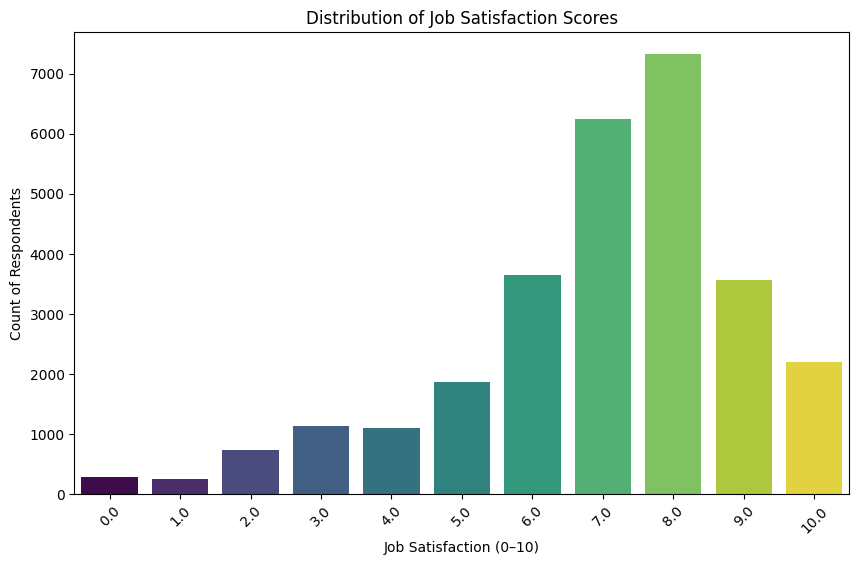

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(
    # uncomment data = df and comment the data = df_exp
    # data=df,  # <-- to see the Unknown or missing data
    data=df_exp,  # <-- Changing this from 'df' to 'df_exp' as sub-copy
    x='JobSat',
    hue='JobSat',
    palette='viridis',
    legend=False
)
plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction (0–10)')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.show()


In [8]:
# ## --Alternative Option--
# import matplotlib.pyplot as plt

# # 1. Prepare the data: Count occurrences of each JobSat score
# # We sort by index so the X-axis goes from 0.0 to 10.0
# jobsat_counts = df['JobSat'].value_counts().sort_index()

# # 2. Create the plot
# plt.figure(figsize=(10, 6))
# jobsat_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# # 3. Customizing the plot
# plt.title('Distribution of Job Satisfaction Scores', fontsize=14)
# plt.xlabel('Job Satisfaction Score (0 = Lowest, 10 = Highest)', fontsize=12)
# plt.ylabel('Number of Respondents', fontsize=12)

# # Adding a grid for easier reading of the frequency
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Rotate x-ticks if they look crowded
# plt.xticks(rotation=0)

# plt.tight_layout()
# plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


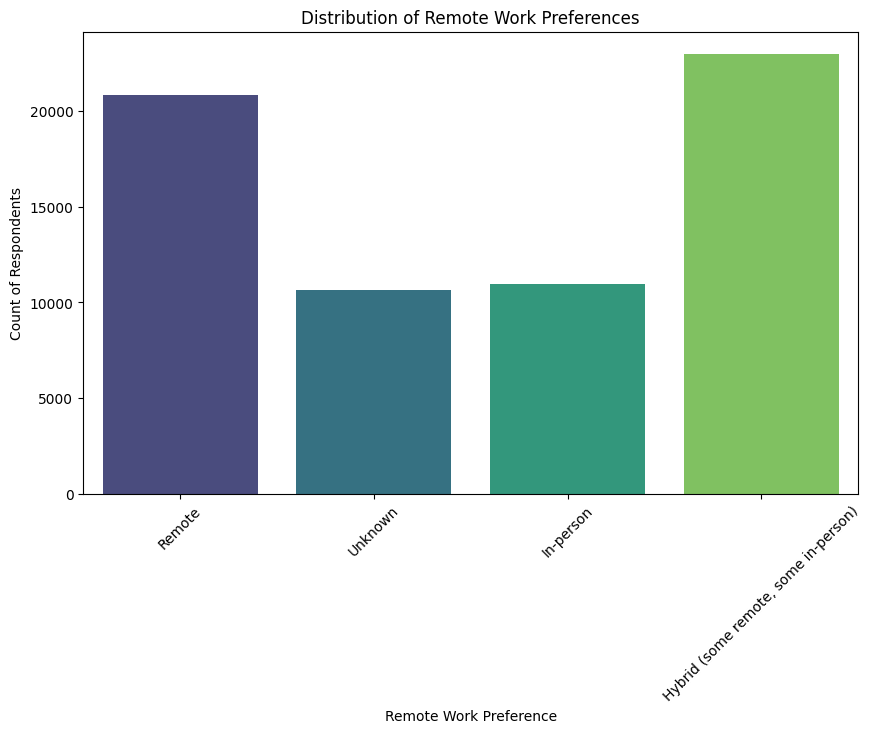


Remote Work Preference by Employment Type:

Employment                            Employed, full-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                17281   
In-person                                            8552   
Remote                                              13193   
Unknown                                                15   

Employment                            Employed, full-time;Employed, part-time  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)                                       85   
In-person                                                                  32   
Remote                                                                     95   
Unknown                                                                     0   

Employment                            Employed, full-time;Independent contractor, freelancer, or self

In [9]:
# Analyzing Remote Work Preferences by Job Role

# 1. Count plot of remote‑work distribution
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='RemoteWork',
    hue='RemoteWork',
    palette='viridis',
    legend=False
)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.show()

# 2. Cross‑tab: RemoteWork × Employment type
remote_by_employment = pd.crosstab(df['RemoteWork'], df['Employment'])
print("\nRemote Work Preference by Employment Type:\n")
print(remote_by_employment)

# 3. Cross‑tab: RemoteWork × Job Role
# If your dataset uses DevType or JobRole, adjust the column name accordingly

# ## To make the output readable and clearly visible, uncomment the following line before printing:
# pd.set_option('display.max_rows', 200)

remote_by_role = pd.crosstab(df['RemoteWork'], df['DevType'])
print("\nRemote Work Preference by Job Role:\n")
print(remote_by_role)


In [10]:
### --Alternative Option---
# import matplotlib.pyplot as plt
# import pandas as pd

# # 1. Visualization: Overall Remote Work Distribution
# remote_counts = df['RemoteWork'].value_counts()

# plt.figure(figsize=(8, 6))
# remote_counts.plot(kind='bar', color=['#4F81BD', '#C0504D', '#9BBB59'], edgecolor='black')

# plt.title('Distribution of Remote Work Preferences', fontsize=14)
# plt.xlabel('Work Environment', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

# # 2. Cross-tabulation: Remote Work vs. Employment Type
# employment_remote_xtab = pd.crosstab(df['Employment'], df['RemoteWork'])

# print("--- Cross-tabulation: Employment Type vs. Remote Work ---")
# print(employment_remote_xtab)

# # 3. Visualization: Stacked Bar Chart for Employment × RemoteWork
# plt.figure(figsize=(12, 7))
# employment_remote_xtab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

# plt.title('Remote Work Preferences by Employment Type', fontsize=14)
# plt.xlabel('Employment Status', fontsize=12)
# plt.ylabel('Number of Respondents', fontsize=12)
# plt.legend(title='Remote Work Status')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

# # 4. Cross-tabulation: Remote Work vs. Job Role
# jobrole_remote_xtab = pd.crosstab(df['DevType'], df['RemoteWork'])

# print("\n--- Cross-tabulation: Job Role vs. Remote Work ---")
# print(jobrole_remote_xtab)

# # 5. Visualization: Stacked Bar Chart for JobRole × RemoteWork
# fig, ax = plt.subplots(figsize=(18, 12))
# jobrole_remote_xtab.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# plt.title('Remote Work Preferences by Job Role', fontsize=16)
# plt.xlabel('Job Role', fontsize=14)
# plt.ylabel('Number of Respondents', fontsize=14)
# plt.legend(title='Remote Work Status')

# plt.xticks(rotation=90)

# # Extra bottom margin so labels fit
# plt.subplots_adjust(bottom=0.35)

# plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


C:\Users\USER\AppData\Local\Temp\ipykernel_1256\913751601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')



Top Programming Languages in United States of America:

LanguageList
JavaScript                 6849
Python                     6238
SQL                        5766
HTML/CSS                   5754
Bash/Shell (all shells)    4776
TypeScript                 4173
C#                         3112
Java                       2949
C++                        2607
C                          2225
Name: count, dtype: int64


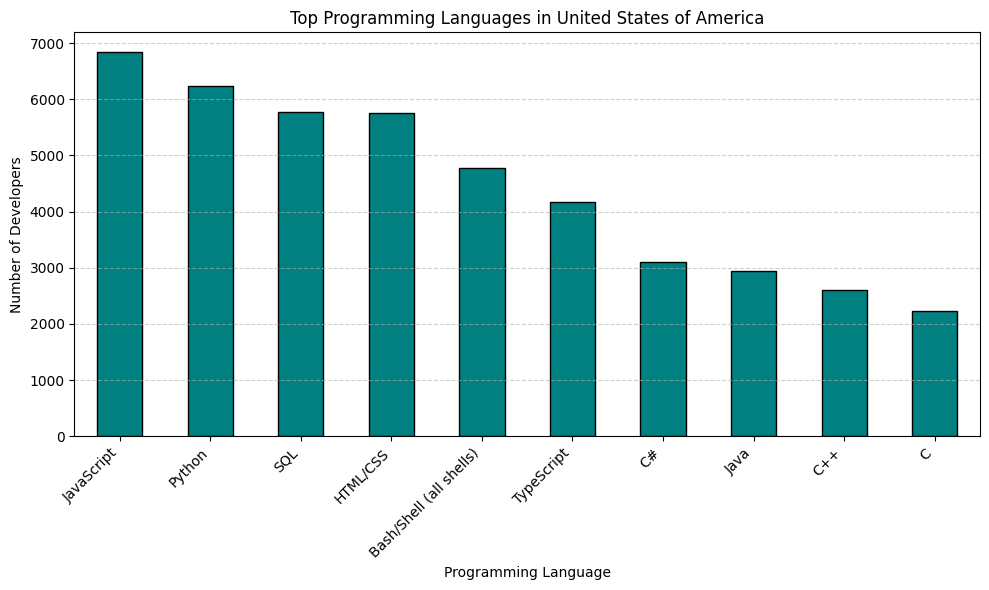

In [11]:
# Alternative option for Analyzing Programming Language Trends by Region

# 1. Keep only rows with both region and language data
df_lang = df.dropna(subset=['Country', 'LanguageHaveWorkedWith'])

# 2. Split multi-language strings
df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')

# 3. Explode into one language per row
df_exploded = df_lang.explode('LanguageList')

# 4. Choose a region
region = 'United States of America'   # change to any country you want

df_region = df_exploded[df_exploded['Country'] == region]

# 5. Count top languages
top_lang_region = df_region['LanguageList'].value_counts().head(10)

print(f"\nTop Programming Languages in {region}:\n")
print(top_lang_region)

# 6. Plot only if data exists
if not top_lang_region.empty:
    plt.figure(figsize=(10, 6))
    top_lang_region.plot(kind='bar', color='teal', edgecolor='black')
    plt.title(f'Top Programming Languages in {region}')
    plt.xlabel('Programming Language')
    plt.ylabel('Number of Developers')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print(f"\nNo programming‑language data available for {region}.")


In [12]:
# # Step 7: Analyzing Programming Language Trends by Region

# import pandas as pd
# import matplotlib.pyplot as plt

# # 1. Keep only rows with both region and language data
# df_lang = df.dropna(subset=['Country', 'LanguageHaveWorkedWith'])

# # 2. Split the multi‑language strings into lists
# df_lang['LanguageList'] = df_lang['LanguageHaveWorkedWith'].str.split(';')

# # 3. Explode so each language becomes its own row
# df_exploded = df_lang.explode('LanguageList')

# # 4. Filter to a specific region (example: United States)
# region = 'United States of America'
# df_region = df_exploded[df_exploded['Country'] == region]

# # 5. Count top languages in that region
# top_lang_region = df_region['LanguageList'].value_counts().head(10)
# print(f"\nTop Programming Languages in {region}:\n")
# print(top_lang_region)

# # 6. Visualization: Top languages in the region
# plt.figure(figsize=(10, 6))
# top_lang_region.plot(kind='bar', color='teal', edgecolor='black')
# plt.title(f'Top Programming Languages in {region}')
# plt.xlabel('Programming Language')
# plt.ylabel('Number of Developers')
# plt.xticks(rotation=45, ha='right')
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

# # # 7. Optional: Heatmap-style pivot for multiple regions
# # pivot = df_exploded.pivot_table(
# #     index='Country',
# #     columns='LanguageList',
# #     aggfunc='size',
# #     fill_value=0
# # )

# # Show only top 10 languages globally for readability
# top10_global = df_exploded['LanguageList'].value_counts().head(10).index
# pivot_top10 = pivot[top10_global]

# print("\nLanguage Popularity Across Regions (Top 10 Languages):\n")
# print(pivot_top10)


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


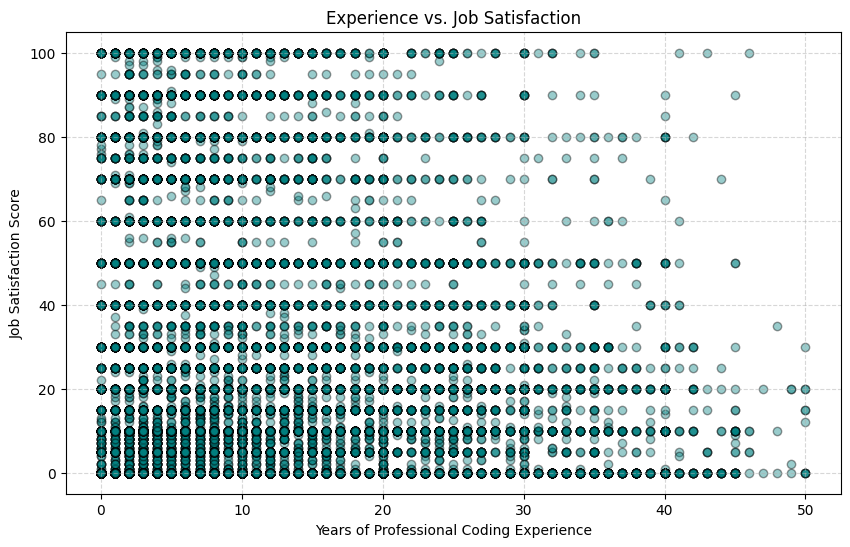

The Pearson correlation coefficient between experience and satisfaction is: -0.0282


In [13]:
# Correlation Between Experience and Satisfaction

# Keep only numeric rows
df_corr = df[['YearsCodePro', 'JobSatPoints_1']].copy()
df_corr = df_corr.apply(pd.to_numeric, errors='coerce').dropna()

plt.figure(figsize=(10, 6))
plt.scatter(
    df_corr['YearsCodePro'],
    df_corr['JobSatPoints_1'],
    alpha=0.4,
    color='teal',
    edgecolor='black'
)

plt.title('Experience vs. Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# 4. Calculate the Correlation Coefficient (Pearson's r)
correlation = df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(f"The Pearson correlation coefficient between experience and satisfaction is: {correlation:.4f}")


In [14]:
# # import matplotlib.pyplot as plt
# # import seaborn as sns
# # import pandas as pd

# # 1. Prepare 'YearsCodePro' (Numeric Conversion)
# # Handling string edge cases and converting to float
# df['YearsCodePro'] = df['YearsCodePro'].replace({
#     'Less than 1 year': 0.5, 
#     'More than 50 years': 51
# })
# df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# # 2. Create the Scatter Plot
# plt.figure(figsize=(12, 8))

# # Optimization: Using 'alpha' (transparency) is crucial because 
# # thousands of points will overlap (overplotting).
# sns.scatterplot(
#     data=df, 
#     x='YearsCodePro', 
#     y='JobSatPoints_1', 
#     alpha=0.4, 
#     color='#4F81BD',
#     s=60  # Size of the dots
# )

# # 3. Add a Trend Line (Regression Line)
# # This helps visually confirm if the correlation is positive or negative
# sns.regplot(
#     data=df, 
#     x='YearsCodePro', 
#     y='JobSatPoints_1', 
#     scatter=False, 
#     color='#C0504D'
# )

# plt.title('Correlation: Years of Experience vs. Job Satisfaction', fontsize=16)
# plt.xlabel('Years of Professional Coding Experience', fontsize=12)
# plt.ylabel('Job Satisfaction Score (Points)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.5)

# plt.show()

# # 4. Calculate the Correlation Coefficient (Pearson's r)
# correlation = df['YearsCodePro'].corr(df['JobSatPoints_1'])
# print(f"The Pearson correlation coefficient between experience and satisfaction is: {correlation:.4f}")


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross‑tabulation of Education Level vs Employment Type:

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
As

C:\Users\USER\AppData\Local\Temp\ipykernel_1256\2066284762.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


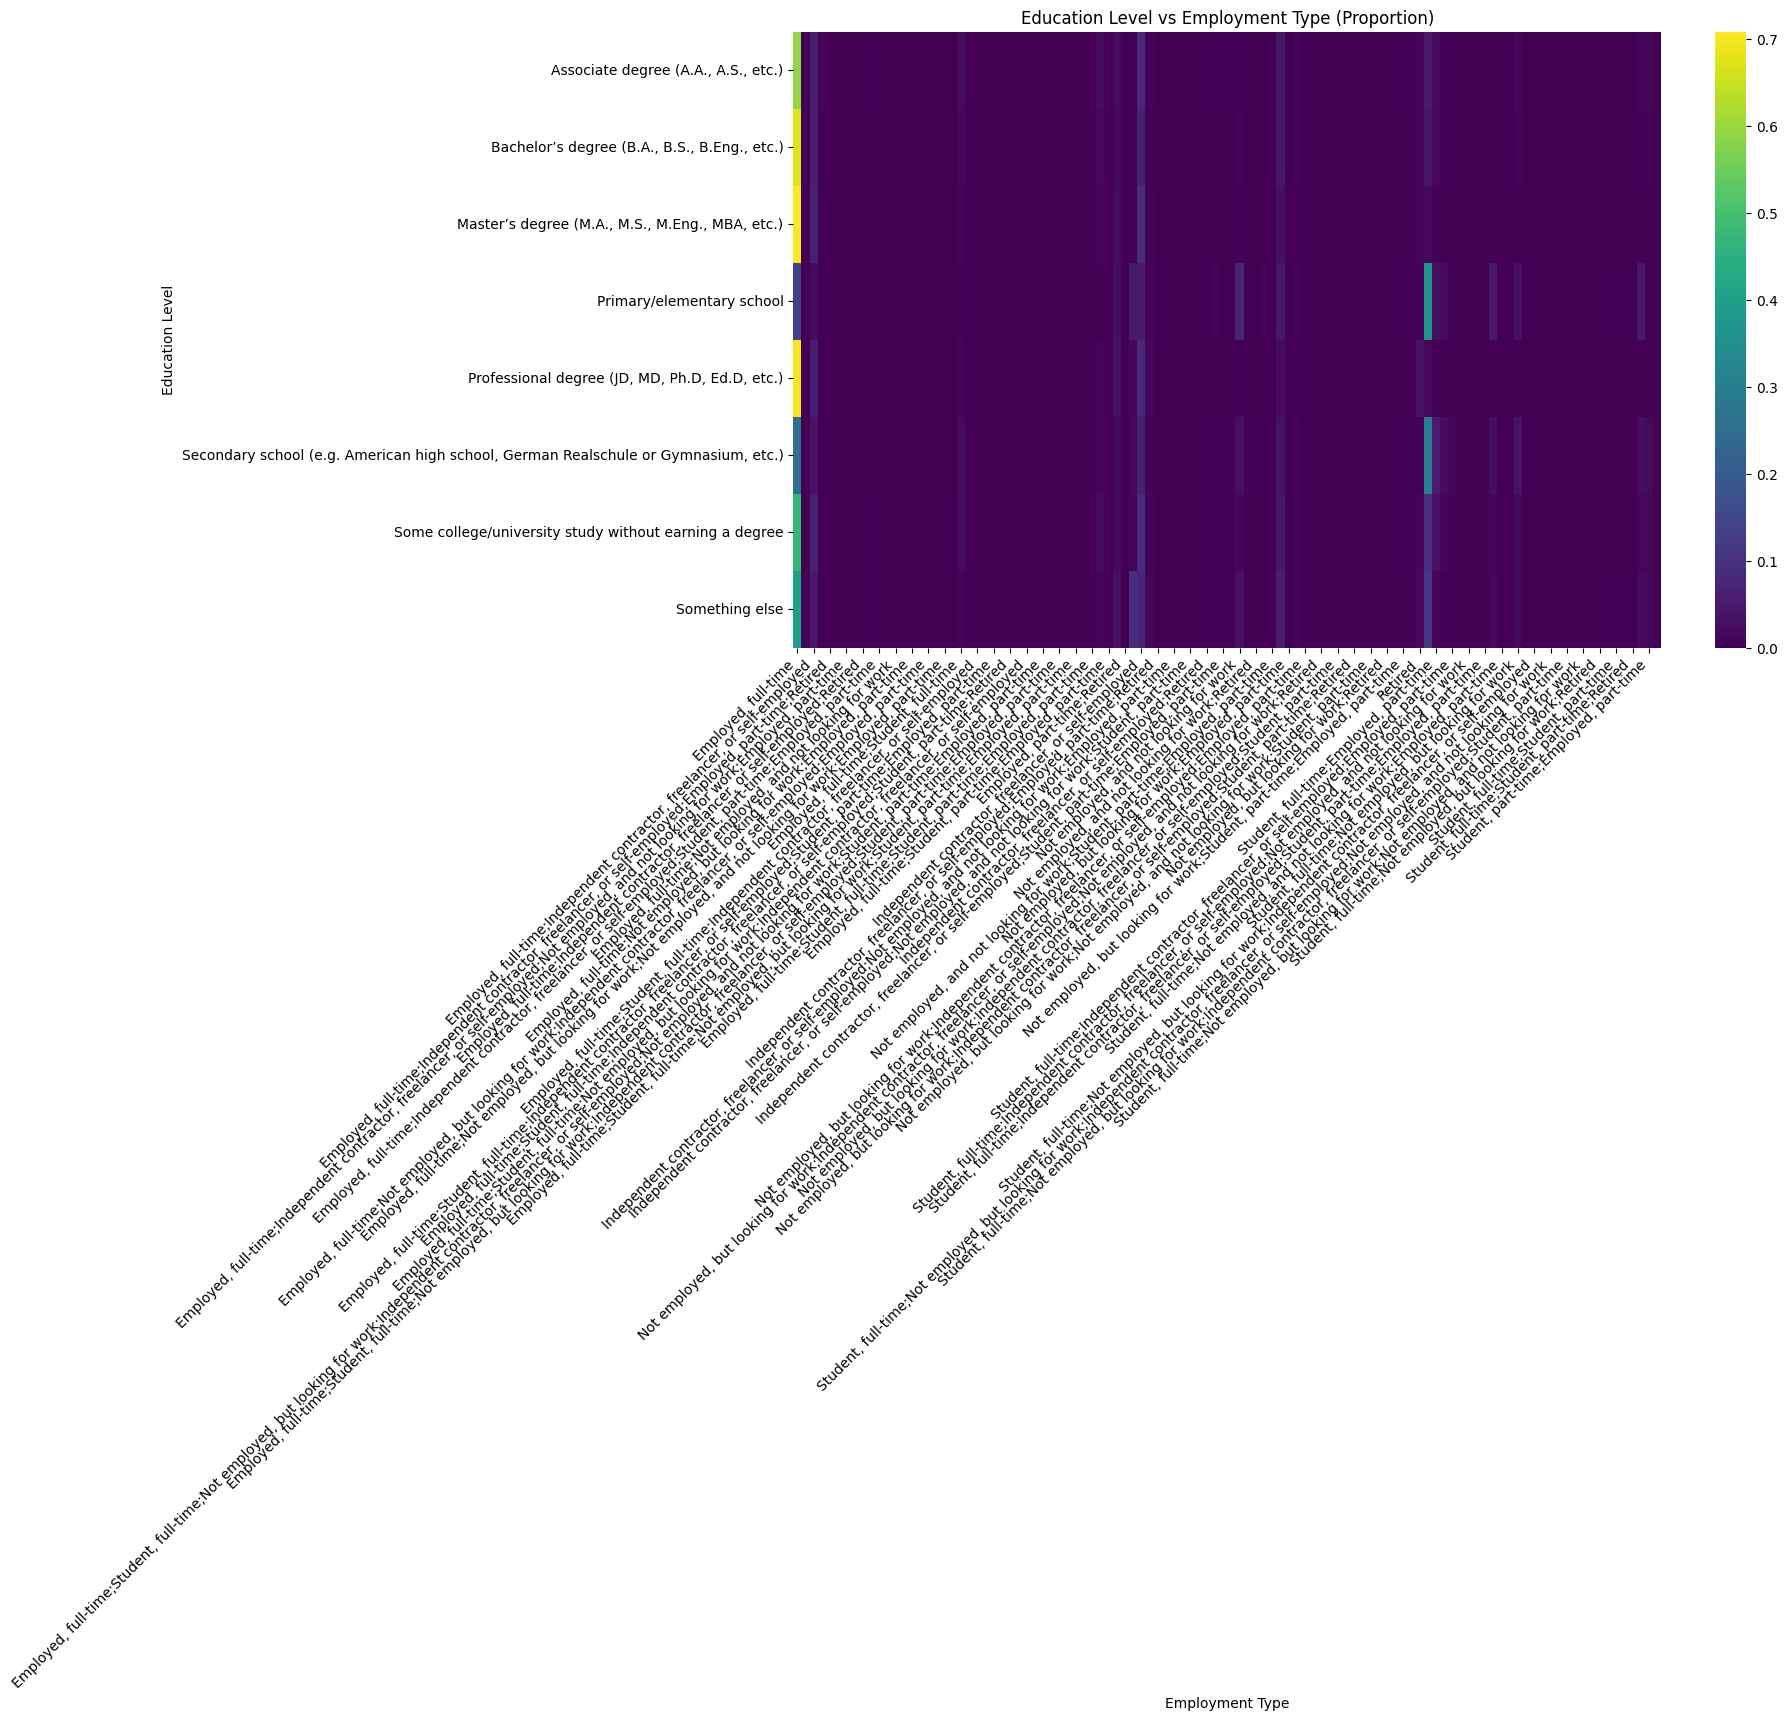

In [15]:
# Educational Background and Employment Type

# 1. Keep only rows with both EdLevel and Employment
df_ed = df.dropna(subset=['EdLevel', 'Employment'])

# 2. Cross‑tabulation
ct = pd.crosstab(df_ed['EdLevel'], df_ed['Employment'])
print("Cross‑tabulation of Education Level vs Employment Type:\n")
print(ct)

# 3. Normalize by row to see proportions
ct_norm = ct.div(ct.sum(axis=1), axis=0)

# 4. Heatmap visualization
plt.figure(figsize=(14, 8))
sns.heatmap(ct_norm, annot=False, cmap='viridis')
plt.title('Education Level vs Employment Type (Proportion)')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


--- Percentage of Employment Types by Education Level ---
Employment                                      Employed, full-time  \
EdLevel_Clean                                                         
Associate                                                     59.06   
Bachelor's                                                    67.38   
High School                                                   25.20   
Master's                                                      70.78   
Other                                                         40.45   
Primary School                                                13.96   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                69.80   
Some College                                                  46.78   

Employment                                      Employed, full-time;Employed, part-time  \
EdLevel_Clean                                                                             
Associate                                        

C:\Users\USER\AppData\Local\Temp\ipykernel_1256\3471655044.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


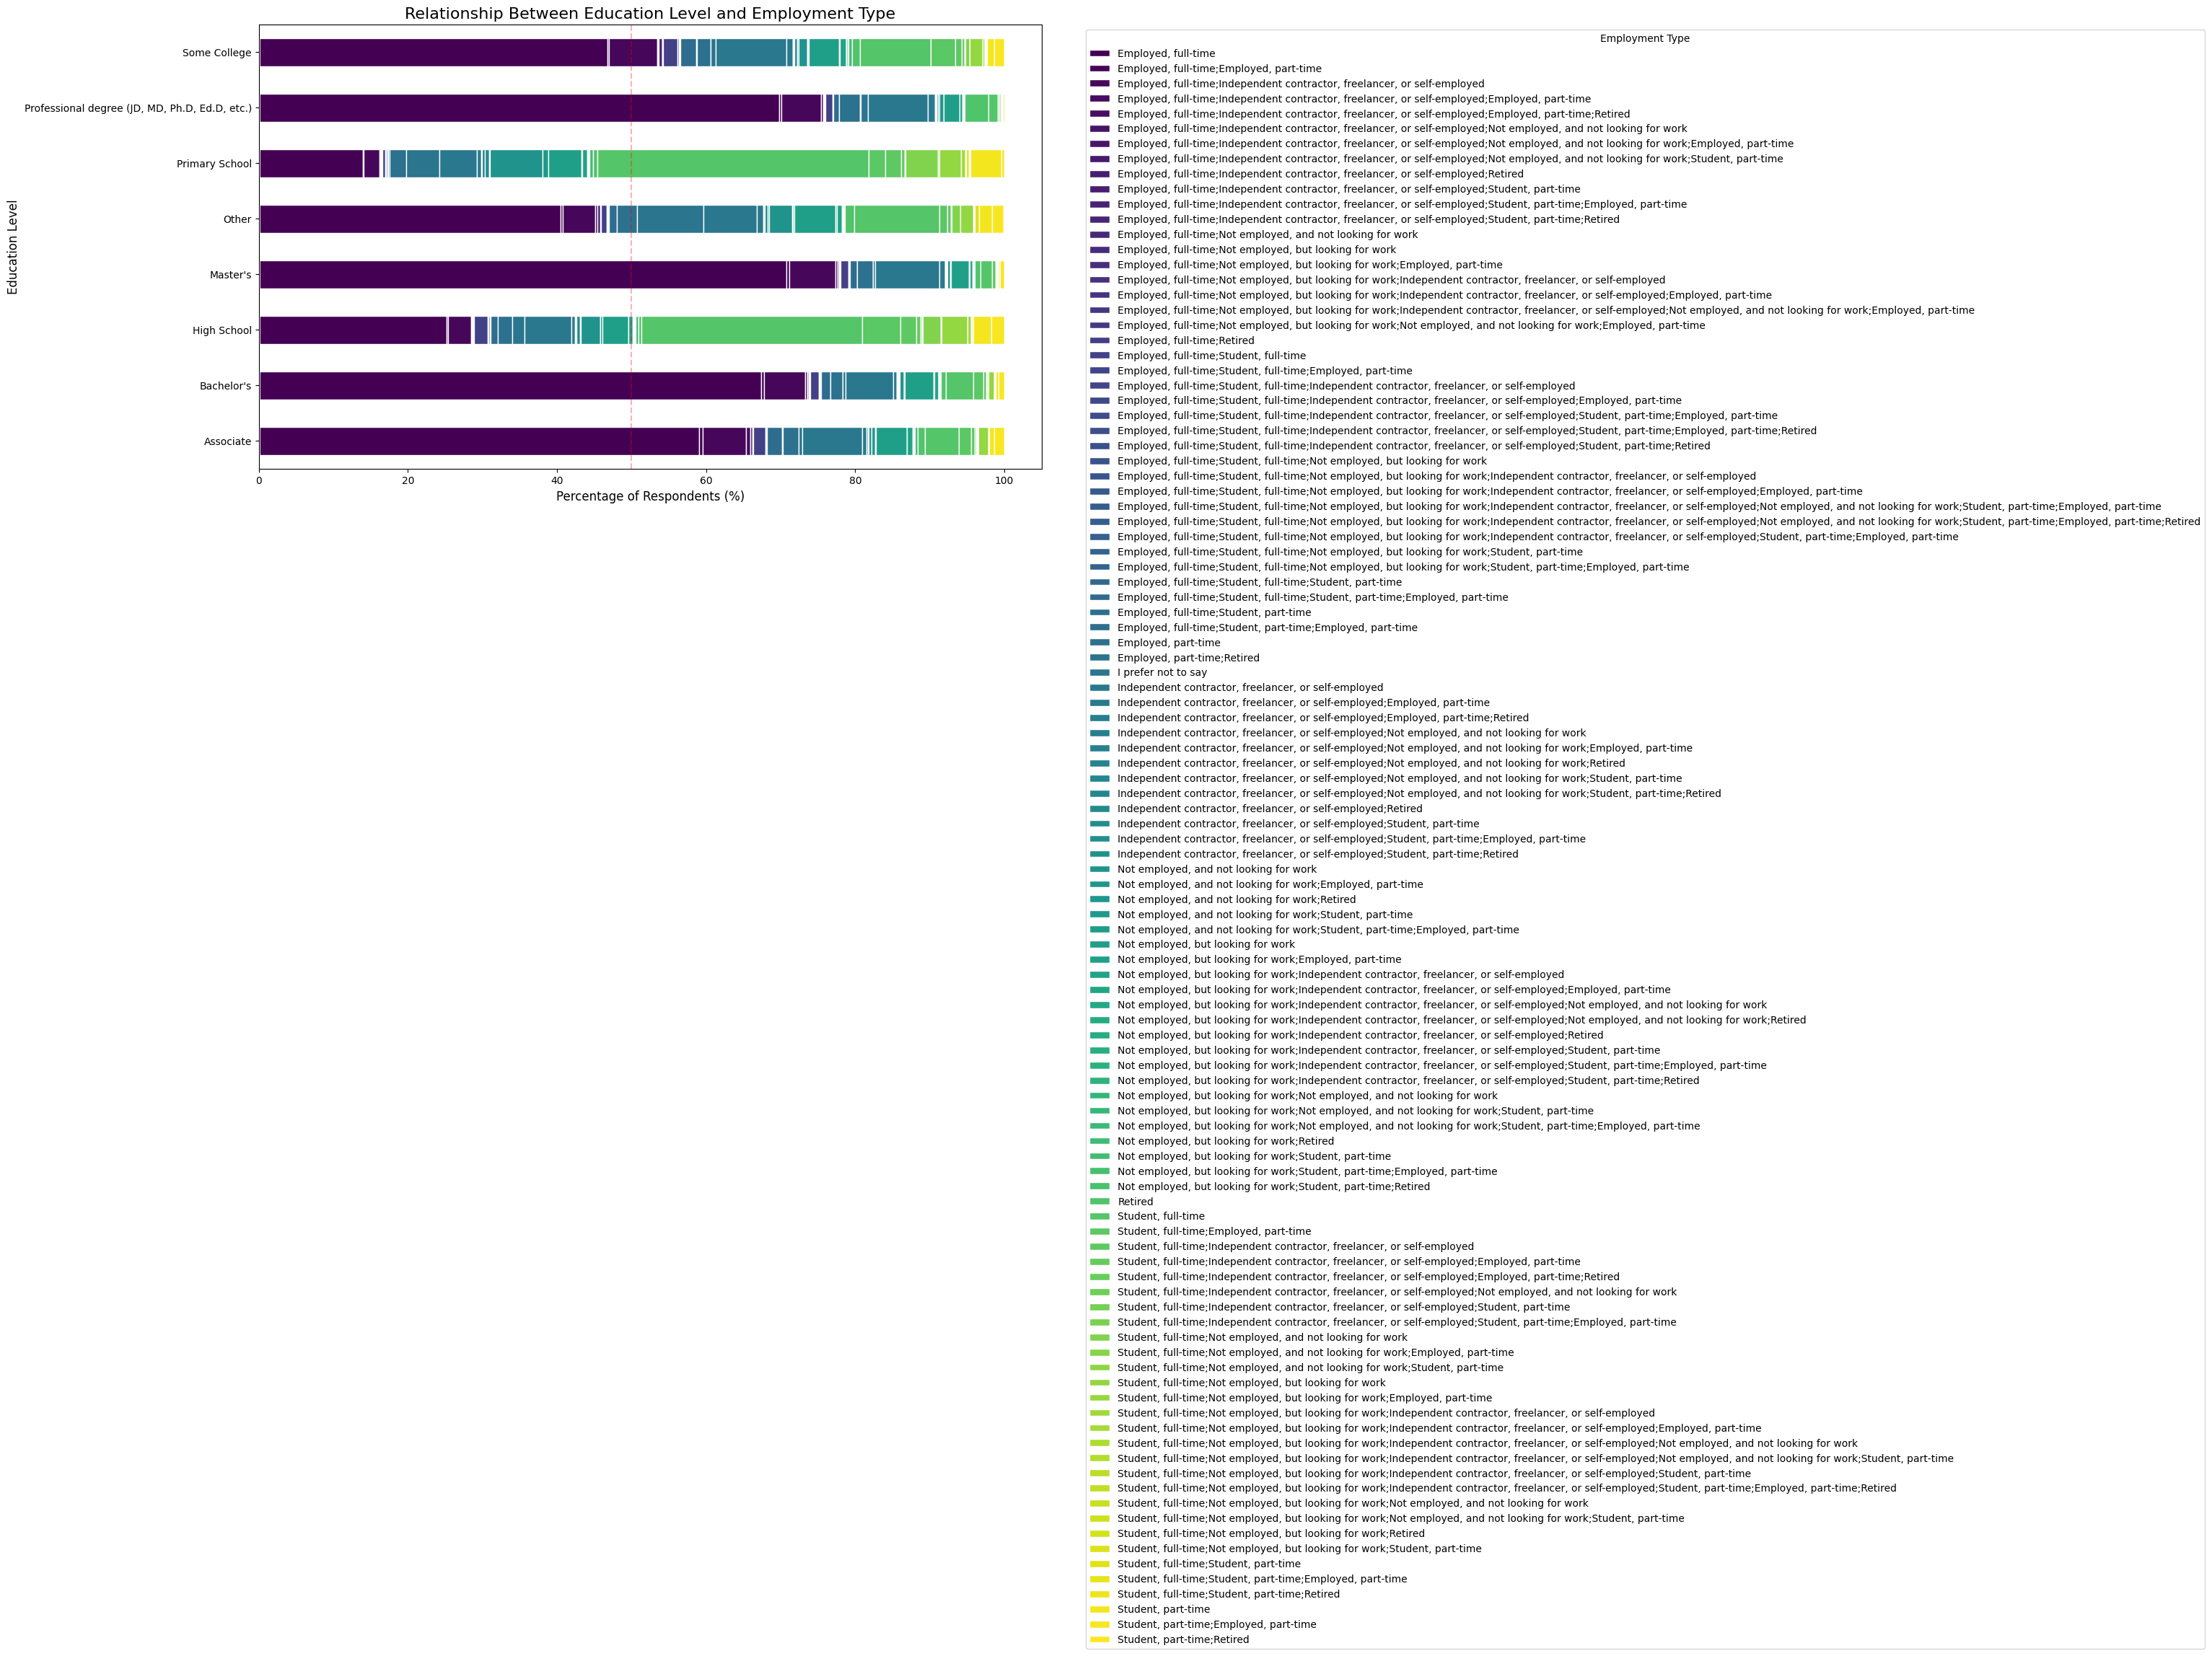

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Robust Cleaning: Simplify Education Levels
# Original strings are often too long for chart labels
ed_map = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': "Bachelor's",
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': "Master's",
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': "High School",
    'Some college/university study without earning a degree': "Some College",
    'Other doctoral degree (Ph.D., Ed.D., etc.)': "PhD",
    'Associate degree (A.A., A.S., etc.)': "Associate",
    'Professional degree (JD, MD, etc.)': "Professional Degree",
    'Primary/elementary school': "Primary School",
    'Something else': "Other"
}
df['EdLevel_Clean'] = df['EdLevel'].replace(ed_map)

# 2. Cross-tabulation: EdLevel vs. Employment
# We normalize by index to see the *proportion* of employment types per education level
ed_emp_xtab = pd.crosstab(df['EdLevel_Clean'], df['Employment'], normalize='index') * 100

print("--- Percentage of Employment Types by Education Level ---")
print(ed_emp_xtab.round(2))

# 3. Visualization: Stacked Bar Chart
# Using a horizontal bar chart so the long education names are easy to read
ax = ed_emp_xtab.plot(kind='barh', 
                      stacked=True, 
                      figsize=(14, 8), 
                      colormap='viridis', 
                      edgecolor='white')

# Adding labels and styling
plt.title('Relationship Between Education Level and Employment Type', fontsize=16)
plt.xlabel('Percentage of Respondents (%)', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optimization: Add a vertical line at 50% for a visual anchor
plt.axvline(x=50, color='red', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [17]:
# Save the Cleaned and Analyzed Dataset

output_path = "eda_developer_survey_data.csv"
df.to_csv(output_path, index=False)

print("Cleaned dataset saved as:", output_path)


Cleaned dataset saved as: eda_developer_survey_data.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
